In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("global_weather.csv")

# Display first few rows
df.head()


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [3]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows
print(f"Duplicate Rows: {df.duplicated().sum()}")


country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [4]:
df['lastupdated'] = pd.to_datetime(df['last_updated'])
df.set_index('lastupdated', inplace=True)  # Set as index


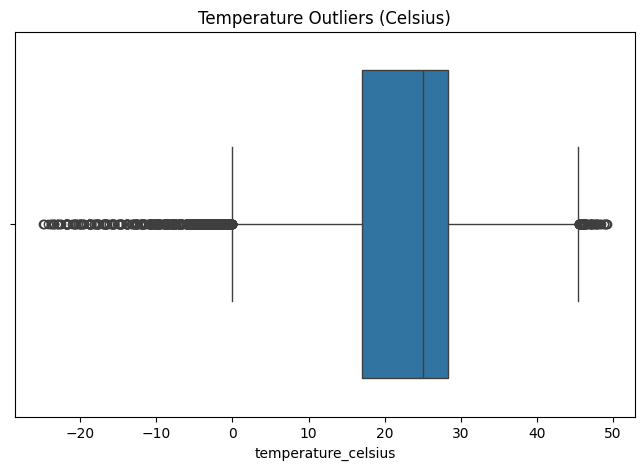

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for temperature in Celsius
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['temperature_celsius'])
plt.title("Temperature Outliers (Celsius)")
plt.show()


In [6]:
Q1 = df['temperature_celsius'].quantile(0.25)
Q3 = df['temperature_celsius'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['temperature_celsius'] >= lower_bound) & (df['temperature_celsius'] <= upper_bound)]


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['temperature_celsius', 'humidity', 'wind_kph']] = scaler.fit_transform(df[['temperature_celsius', 'humidity', 'wind_kph']])


In [8]:
print(df.describe())


           latitude     longitude  last_updated_epoch  temperature_celsius  \
count  57472.000000  57472.000000        5.747200e+04         57472.000000   
mean      18.457296     21.752829        1.728799e+09             0.502218   
std       24.293890     66.002880        7.582503e+06             0.192953   
min      -41.300000   -175.200000        1.715849e+09             0.000000   
25%        3.170000     -6.840000        1.722342e+09             0.392070   
50%       16.780000     21.433300        1.728726e+09             0.552863   
75%       39.930000     49.882200        1.735296e+09             0.629956   
max       64.150000    179.220000        1.742032e+09             1.000000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            57472.000000  57472.000000  57472.000000  57472.000000   
mean                73.042788      8.302506      0.003300    168.418900   
std                 15.768011      9.367240      0.005093    103.474253 

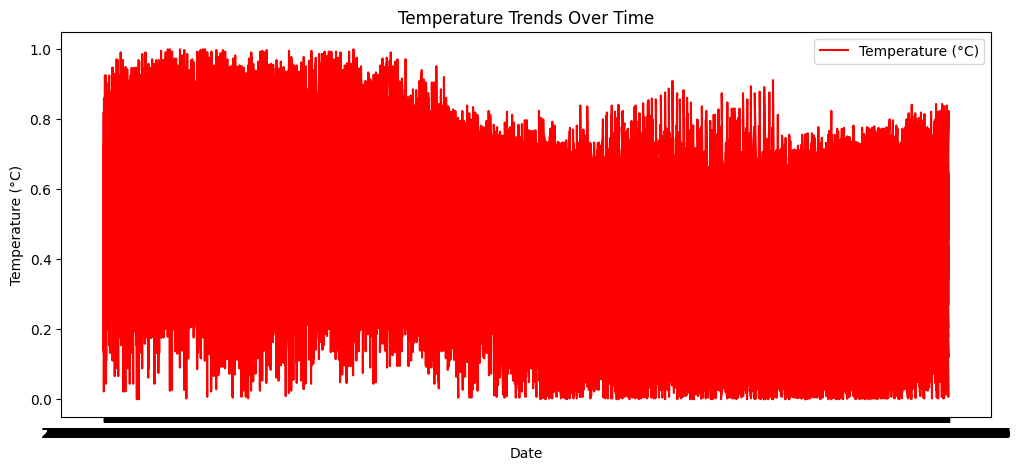

In [9]:
import matplotlib.pyplot as plt

# Plot temperature trend over time
plt.figure(figsize=(12,5))
plt.plot(df['last_updated'], df['temperature_celsius'], label="Temperature (°C)", color='r')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trends Over Time")
plt.legend()
plt.show()


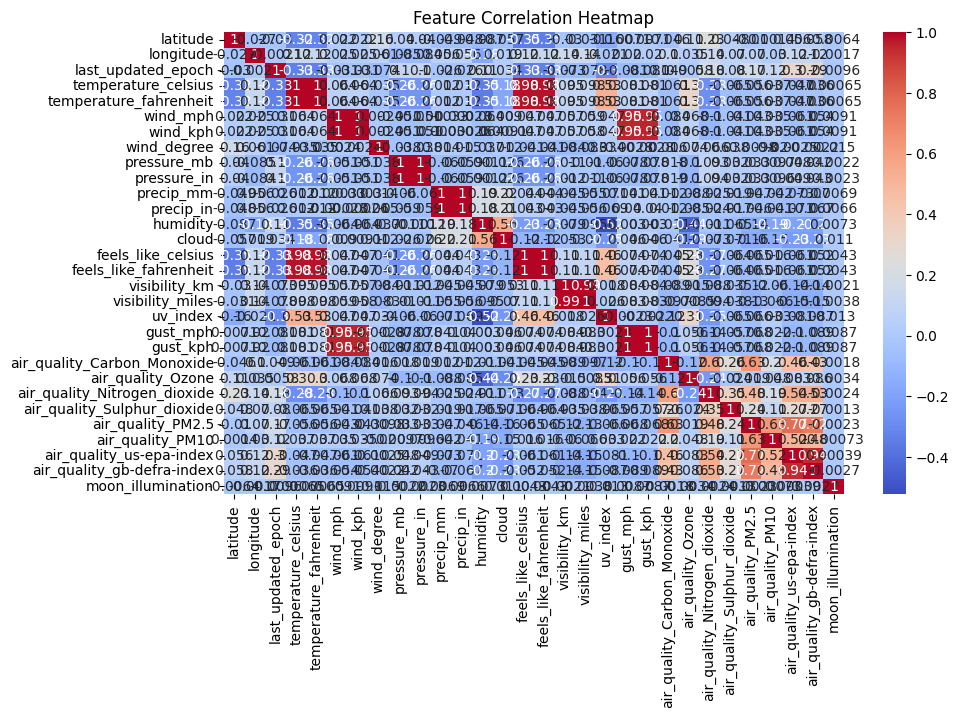

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

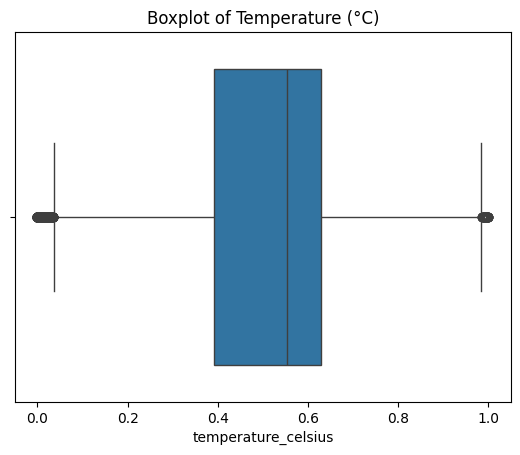

In [11]:
sns.boxplot(x=df['temperature_celsius'])
plt.title("Boxplot of Temperature (°C)")
plt.show()



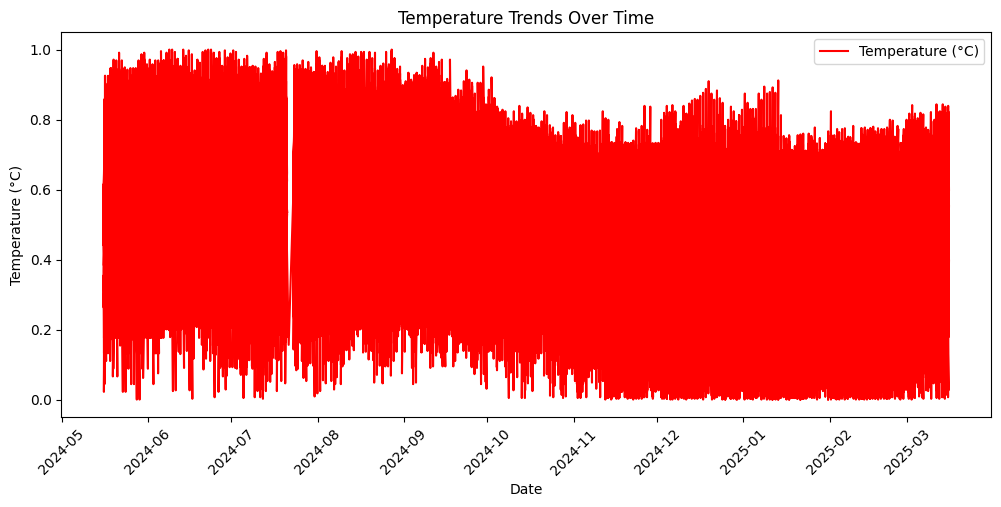

In [12]:
# Convert 'last_updated' to datetime format
df['last_updated'] = pd.to_datetime(df['last_updated'])

# Plot temperature trend over time
plt.figure(figsize=(12, 5))
plt.plot(df['last_updated'], df['temperature_celsius'], label="Temperature (°C)", color='r')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trends Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [14]:
# Ensure last_updated is datetime
df['last_updated'] = pd.to_datetime(df['last_updated'])

# Sort by date
df = df.sort_values(by='last_updated')

# Select features (Temperature Prediction)
features = ['temperature_celsius']
df_lstm = df[features]

# Normalize Data
scaler = MinMaxScaler(feature_range=(0,1))
df_lstm_scaled = scaler.fit_transform(df_lstm)


In [16]:
# Convert data into sequences for LSTM
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define time steps
time_steps = 60

# Create sequences
X, y = create_sequences(df_lstm_scaled, time_steps)

# Split into training & testing (80% train, 20% test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [17]:
# Build LSTM Model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - loss: 0.0434 - val_loss: 0.0424
Epoch 2/20
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - loss: 0.0298 - val_loss: 0.0422
Epoch 3/20
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 0.0293 - val_loss: 0.0425
Epoch 4/20
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - loss: 0.0286 - val_loss: 0.0424
Epoch 5/20
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - loss: 0.0286 - val_loss: 0.0426
Epoch 6/20
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 0.0286 - val_loss: 0.0421
Epoch 7/20
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - loss: 0.0280 - val_loss: 0.0430
Epoch 8/20
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 0.0275 - val_loss: 0.0421
Epoch 9/20
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 1133.1289 - val_loss: 0.0422
Epoch 10/20
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - loss: 0.0279 - val_loss: 0.0427
Epoch 11/20
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 0.0279 - val_loss: 0.0422
Epoch

359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


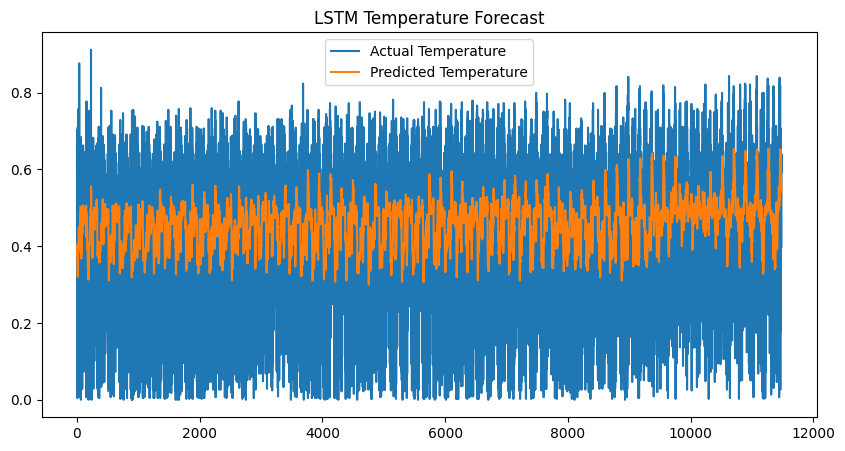

In [18]:
# Predict on test data
y_pred = model.predict(X_test)

# Inverse Transform to get actual temperature values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

# Plot Predictions vs Actual
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label="Actual Temperature")
plt.plot(y_pred_actual, label="Predicted Temperature")
plt.legend()
plt.title("LSTM Temperature Forecast")
plt.show()


In [19]:
!pip install prophet


In [18]:
from prophet import Prophet

# Prepare Data
df_prophet = df[['last_updated', 'temperature_celsius']].rename(columns={'last_updated': 'ds', 'temperature_celsius': 'y'})

# Train Prophet Model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Make Future Predictions
future = model_prophet.make_future_dataframe(periods=30)  # Predict next 30 days
forecast = model_prophet.predict(future)

# Plot Predictions
model_prophet.plot(forecast)
plt.title("Temperature Trend Prediction (Prophet)")
plt.show()


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define optimized LSTM Model
model = Sequential([
    LSTM(150, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),  # Increased units
    Dropout(0.3),  # Increased dropout for regularization
    LSTM(100, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(50, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Output layer
])

# Compile Model with Lower Learning Rate
optimizer = Adam(learning_rate=0.0005)  # Lower LR for better convergence
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the Optimized Model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))  # More epochs, smaller batch size


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 65s 20ms/step - loss: 0.0394 - val_loss: 0.0425
Epoch 2/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 70s 17ms/step - loss: 0.0299 - val_loss: 0.0427
Epoch 3/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 50s 17ms/step - loss: 0.0289 - val_loss: 0.0427
Epoch 4/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - loss: 0.0284 - val_loss: 0.0423
Epoch 5/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - loss: 0.0282 - val_loss: 0.0418
Epoch 6/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 88s 20ms/step - loss: 0.1231 - val_loss: 0.0417
Epoch 7/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 76s 17ms/step - loss: 0.0278 - val_loss: 0.0420
Epoch 8/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 83s 18ms/step - loss: 0.0274 - val_loss: 0.0416
Epoch 9/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 80s 17ms/step - loss: 0.0274 - val_loss: 0.0414
Epoch 10/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 49s 17ms/step - loss: 0.0274 - val_loss: 0.0413
Epoch 11/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 84s 18ms/step - loss: 0.0276 - val_loss: 0.0418
Epoch 12

359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
Optimized Model - MAE: 0.15940828695696038, RMSE: 0.19979794514128746


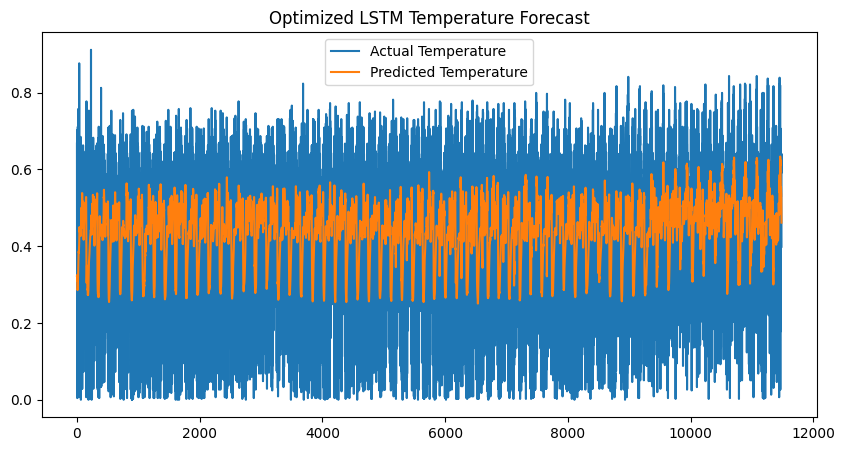

In [21]:
# Predict on test data
y_pred = model.predict(X_test)

# Inverse Transform to get actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

# Calculate MAE & RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print(f"Optimized Model - MAE: {mae}, RMSE: {rmse}")

# Plot Predictions vs Actual
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label="Actual Temperature")
plt.plot(y_pred_actual, label="Predicted Temperature")
plt.legend()
plt.title("Optimized LSTM Temperature Forecast")
plt.show()
